
## Solving Max-Cut


In [1]:
import numpy as np
from functools import reduce

PAULIS = {
    "I": np.eye(2, dtype=complex),
    "X": np.array([[0, 1], [1, 0]], dtype=complex),
    "Y": np.array([[0, -1j], [1j, 0]], dtype=complex),
    "Z": np.array([[1, 0], [0, -1]], dtype=complex),
}

# calculate the edge between A and B
print(reduce(np.kron, [PAULIS["I"], PAULIS["Z"], PAULIS["Z"]]))
#CAPTION Calculate the tensor product classically

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j  0.+0.j -0.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j  0.+0.j -0.+0.j -0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j -0.+0.j  0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  0.-0.j  0.+0.j -0.+0.j -0.+0.j  1.-0.j]]


In [9]:
from qiskit import Aer, QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with one qubit
qc = QuantumCircuit(3)

# specify the connected nodes
qc.z(0)
qc.z(1)

backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend).result()

ab = result.get_unitary(qc,2).data
print(ab)
#CAPTION Calculate the tensor product using a quantum circuit

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j -1.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j  0.-0.j  1.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -1.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -1.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  1.-0.j]]


In [12]:
def tensor_product(qubits, node1, node2):
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(qubits)

    # specify the connected nodes
    qc.z(node1)
    qc.z(node2)

    backend = Aer.get_backend('unitary_simulator')
    result = execute(qc,backend).result()

    edge = result.get_unitary(qc,2)
    return edge

H = tensor_product(3, 0, 1) + tensor_product(3, 1, 2)
print(H.data)
#CAPTION Function to calculate the tensor product

[[ 2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -2.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -2.+0.j -0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  2.-0.j]]


In [13]:
# SKIPCELL
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib


from collections import defaultdict
from functools import reduce
from itertools import product
import numpy as np
from qiskit import Aer, QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from scipy.optimize import minimize_scalar, minimize
from numpy import pi
import random

PAULIS = {
    "I": np.eye(2, dtype=complex),
    "X": np.array([[0, 1], [1, 0]], dtype=complex),
    "Y": np.array([[0, -1j], [1j, 0]], dtype=complex),
    "Z": np.array([[1, 0], [0, -1]], dtype=complex),
}


def pauli_decomposition(H):
    n = int(np.log2(len(H)))
    dims = 2 ** n

    if H.shape != (dims, dims):
        raise ValueError("The input must be a 2^n x 2^n dimensional matrix.")

    basis_key = ["".join(k) for k in product(PAULIS.keys(), repeat=n)]
    components = defaultdict(int)

    for i, val in enumerate(product(PAULIS.values(), repeat=n)):
        basis_mat = reduce(np.kron, val)
        coeff = H.reshape(-1).dot(basis_mat.reshape(-1)) / dims
        coeff = np.real_if_close(coeff).item()
        
        if not np.allclose(coeff, 0):
            components[basis_key[i]] = coeff

    return components


def matrix_decomposition_circuits(H,add_ansatz):
    n = int(np.log2(len(H)))
    dims = 2 ** n

    if H.shape != (dims, dims):
        raise ValueError("The input must be a 2^n x 2^n dimensional matrix.")

    components = pauli_decomposition(H)
    
    circuits = {}
    for (paulistring, weight) in components.items():
        paulis = list(enumerate(reversed(paulistring)))
        
        qr = QuantumRegister(n, "qr")
        cr = ClassicalRegister(1, "cr")
        qc = QuantumCircuit(qr, cr)
        
        add_ansatz(qc, qr)

        # don't do anything if all Paulis are I
        if all(x[1] == "I" for x in paulis):
            # we use this empty circuit that we will measure as "0" (eigenvalue 1) in all cases
            circuits[paulistring] = (qc, weight)
            continue
        
        # do the single qubit transformations
        for idx, letter in paulis:
            if letter == "X":
                qc.h(qr[idx])
            elif letter == "Y":
                qc.h(qr[idx])
                qc.sdg(qr[idx])
                
        # add the inter-qubit gates
        for idx, (first, second) in enumerate(zip(paulis, paulis[1:])):
            if second[1] == "I":
                qc.swap(first[0], second[0])
            elif first[1] != "I":
                paulis[idx+1] = (paulis[idx+1][0], paulis[idx][1])
                qc.cx(first[0], second[0])
            
        # measure the highest qubit
        qc.measure(qr[-1], cr[0])
        circuits[paulistring] = (qc, weight)
        
    return circuits

def ansatz(qc, qr, thetas, rounds=3):
    for r in range(rounds):
        for i in range(len(qr)):
            offset = r*len(qr)*2 +i*2
            
            qc.ry(thetas[offset], qr[i])
            qc.rz(thetas[offset+1], qr[i])
            
            if i > 0 and r < rounds - 1:
                qc.cx(qr[i-1], qr[i])
            
    return qc


def run_circuit(circuit, backend, shots=1000):
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts()
    return (
        (counts["0"] if "0" in counts.keys() else 0)
        - (counts["1"] if "1" in counts.keys() else 0)
    )/shots
    
    
def expectation(H, rounds, thetas):
    backend = Aer.get_backend('qasm_simulator')
    circuits = matrix_decomposition_circuits(
        H,
        lambda qc, qr: ansatz(qc, qr, thetas, rounds)
    )
    
    return sum(map(lambda key: run_circuit(circuits[key][0], backend)*circuits[key][1], circuits.keys()))

class SPSA:
    
    def __init__(self, a, c, A, alpha, gamma, H, loss_function):
        # Initialize gain parameters and decay factors
        self.a = a
        self.c = c
        self.A = A
        self.alpha = alpha
        self.gamma = gamma
        self.loss_function = loss_function

        # counters
        self.t = 0
        

    def step(self, current_estimate):
        # get the current values for gain sequences
        a_t = self.a / (self.t + 1 + self.A)**self.alpha
        c_t = self.c / (self.t + 1)**self.gamma

        # get the random perturbation vector from bernoulli distribution
        delta = np.random.randint(0,2, np.array(current_estimate).shape) * 2 - 1
        
        # measure the loss function at perturbations
        loss_plus = self.loss_function(current_estimate + delta * c_t)
        loss_minus = self.loss_function(current_estimate - delta * c_t)
        
        # compute the estimate of the gradient
        g_t = (loss_plus - loss_minus) / (2.0 * delta * c_t)
        
        # update the estimate of the parameter
        current_estimate = current_estimate - a_t * g_t

        # increment the counter
        self.t += 1

        return current_estimate

def vqe(H, rounds, max_iter, thetas=None, save_steps=None):
    
    cnt_qubits = int(np.log2(len(H)))
    if thetas is None:
        thetas = list(map(
                lambda x: random.random(),
                [0] * ((1+rounds)*cnt_qubits*2)
            ))
    
    # create the optimizer class
    optimizer = SPSA(
        a=0.9,
        c=1.0,
        A=max_iter/10,
        alpha=0.6,
        gamma=0.1,
        H=H,
        loss_function=lambda t_thetas: expectation(H, rounds, t_thetas))

    # the main loop
    for i in range(max_iter):
        thetas = optimizer.step(thetas)
        
        if save_steps is not None and i % save_steps == 0:
            yield (i, thetas, expectation(H, rounds, thetas))

    return (thetas, expectation(H, rounds, thetas))
#CAPTION The Variational Quantum Eigensolver


In [14]:
step_size = 10

steps = []
evs = []
thetas = None
for step in vqe(H.data, rounds=3, max_iter=200, save_steps=step_size):
    steps = steps + [step[2]]
    evs = evs + [step[0]]
    thetas = step[1]
    print('Step {step}. Current expectation value: {ev: .3f}'.format(step=step[0], ev=step[2]))

print('The solution is: [\n'
    +"".join(["\t"+str(round(t, 3))
    +",\n" if i%3 == 2 else "\t"+str(round(t, 3))
    +",\t" for i, t in enumerate(thetas)])+"]")

print('The lowest expectation value is: {ev: .3f}'.format(ev=steps[-1]))
#CAPTION Running the VQE

Step 0. Current expectation value:  0.494
Step 10. Current expectation value:  0.128
Step 20. Current expectation value:  0.364
Step 30. Current expectation value: -0.058
Step 40. Current expectation value:  0.068
Step 50. Current expectation value: -0.016
Step 60. Current expectation value: -0.274
Step 70. Current expectation value: -0.308
Step 80. Current expectation value: -0.410
Step 90. Current expectation value: -0.618
Step 100. Current expectation value: -0.666
Step 110. Current expectation value: -0.730
Step 120. Current expectation value: -0.818
Step 130. Current expectation value: -0.972
Step 140. Current expectation value: -1.170
Step 150. Current expectation value: -1.356
Step 160. Current expectation value: -1.512
Step 170. Current expectation value: -1.604
Step 180. Current expectation value: -1.694
Step 190. Current expectation value: -1.782
The solution is: [
	0.442,		0.671,		0.227,
	-0.226,		1.373,		-0.141,
	-0.118,		0.526,		0.015,
	0.015,		1.477,		0.402,
	2.526,		0.28

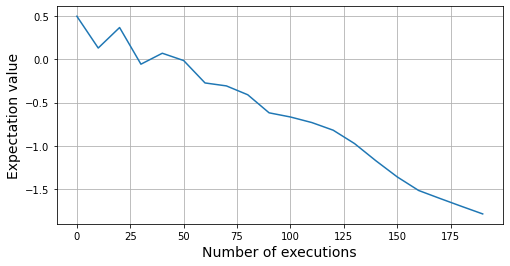

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(evs, steps)

plt.xlabel("Number of executions", fontsize=14)
plt.ylabel("Expectation value", fontsize=14)
plt.grid()

plt.show()
#CAPTION Plotting the progress

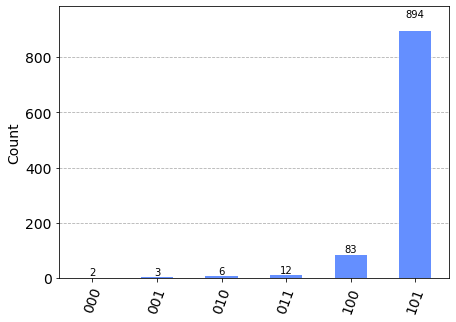

In [16]:
qr = QuantumRegister(3, "qr")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
ansatz(qc, qr, thetas=thetas, rounds=3)

for i in range(3):
    qc.measure(qr[i], cr[i])

backend = Aer.get_backend('qasm_simulator')

result = execute(qc, backend, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the Z-direction

In [17]:
import pandas as pd

data = pd.read_csv('./data/hero-network.csv')

heroes = {
    'MEDUSA/MEDUSALITH AM',
    'ARCLIGHT/PHILLIPA SO',
    'WOLVERINE/LOGAN ',
    'SCARLET WITCH/WANDA ',
    'ARAGORN',
    'OVERMIND/GROM',
    'BATTLEAXE/',
    'ION/',
    'PINK PEARL/'
}

relations = data[(data.hero1.isin(heroes)) & (data.hero2.isin(heroes))]
relations = pd.DataFrame(np.sort(relations.values, axis=1), columns=relations.columns).drop_duplicates(subset=['hero1', 'hero2'])

In [19]:
ordered_heroes = { hero : pos for pos, hero in enumerate(list(heroes)) }

# sum all items
H = sum(
    map(
        # calculate the tensor product
        lambda row: tensor_product(
            len(ordered_heroes),
            ordered_heroes[row[1]["hero1"]],
            ordered_heroes[row[1]["hero2"]]
        ),

        # loop through all relations
        relations.iterrows()
    )
)    
print (H.data)
#CAPTION Applying the VQE on the Marvel Universe

[[13.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  7.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  7.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  7.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  7.+0.j  0.+0.j]
 [ 0.-0.j  0.-0.j  0.-0.j ...  0.-0.j  0.-0.j 13.-0.j]]


In [ ]:
step_size = 10

steps = []
evs = []
thetas = None

for step in vqe(H.data, rounds=3, max_iter=200, save_steps=step_size):
    steps = steps + [step[2]]
    evs = evs + [step[0]]
    thetas = step[1]
    print('Step {step}. Current expectation value: {ev: .3f}'.format(step=step[0], ev=step[2]))


print('The solution is: \n'+str(thetas))
print('The lowest expectation value is: {ev: .3f}'.format(ev=steps[-1]))

plt.figure(figsize=(8, 4))
plt.plot(evs, steps)

plt.xlabel("Number of executions", fontsize=14)
plt.ylabel("Expectation value", fontsize=14)
plt.grid()

plt.show()
#CAPTION Plotting the optimization